In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [7]:
img0 = cv2.imread('../data/Lena.png', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('../data/Lena_rotated.png', cv2.IMREAD_GRAYSCALE)

In [8]:
detector = cv2.ORB_create(100)
kps0, fea0 = detector.detectAndCompute(img0, None)
kps1, fea1 = detector.detectAndCompute(img1, None)

* k =2 인 k 최근접 이웃 기술자 정규 표현식을 작성하고 왼쪽에서 오른쪽 방향으로 매칭되는지 확인, 반대 방향도 확인

In [9]:
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING, False)
matches01 = matcher.knnMatch(fea0, fea1, k=2)
matches10 = matcher.knnMatch(fea1, fea0, k=2)

* distance 디스크립터사이의 거리 

In [30]:
def ratio_test(matches, ratio_thr):
    good_matches = []
    for m in matches:
        ratio = m[0].distance / m[1].distance
        
        if ratio < ratio_thr:
            good_matches.append(m[0])
    return good_matches

RATIO_THR = 1  # 더 낮은 값을 사용해 공격적인 필터링을 수행한다. ration쓰레스홀드가 커지면 더 많아진다.
good_matches01 = ratio_test(matches01, RATIO_THR)
good_matches10 = ratio_test(matches10, RATIO_THR)

* 교차검증 수행, 왼쪽에서 오른쪽 방향으로 확인된 리스트와 오른쪽에서 왼쪽 방향으로 확인된 리스트에 모두 존재하는 것만 사용

In [31]:
good_matches10_ = {(m.trainIdx, m.queryIdx) for m in good_matches10}
final_matches = [m for m in good_matches01 if (m.queryIdx, m.trainIdx) in good_matches10_]

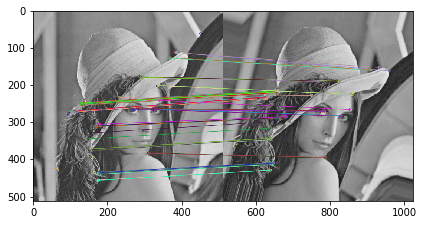

In [32]:
dbg_img = cv2.drawMatches(img0, kps0, img1, kps1, final_matches, None)
plt.figure()
plt.imshow(dbg_img[:,:,[2,1,0]])
plt.tight_layout()
plt.show()